try to detect bold word

- segment word by word
- for each word apply dilate with 5x5
- calculate ON pixel if > 0.3 then is bold

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [149]:
file="D:/Project/PDF2Word/Data/TEST/0001.jpg"

img = cv2.imread(file)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)




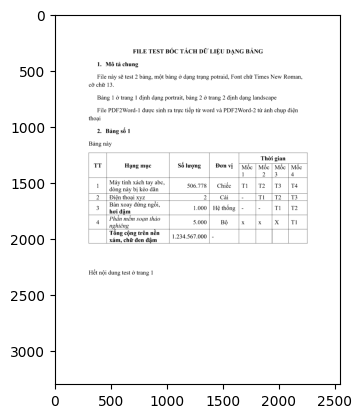

In [150]:
# binary
_, thresh=cv2.threshold(gray,40,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')

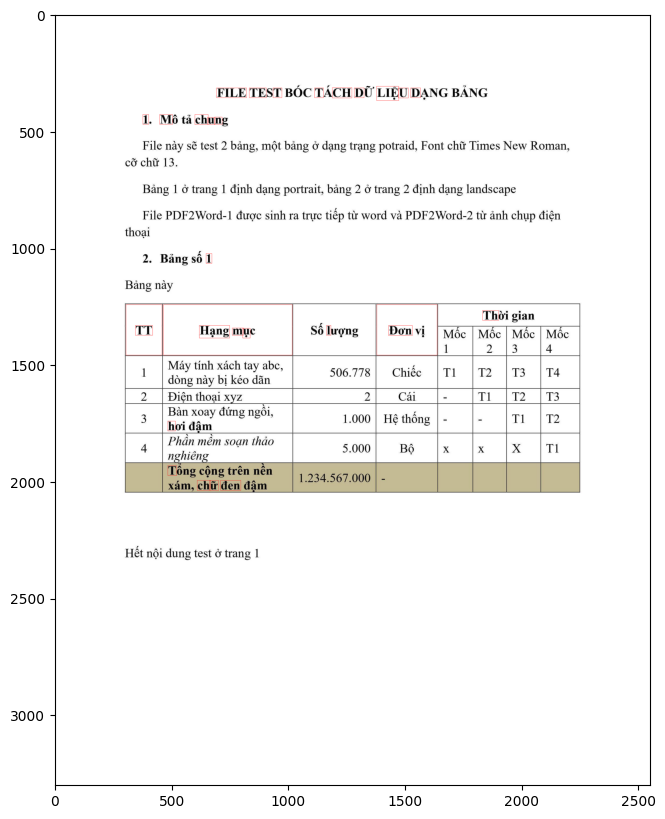

In [151]:
# try to segment word
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
wordsegment = cv2.erode(thresh,kernel,iterations=2)


contours,hierachy= cv2.findContours(wordsegment,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

bold_thresh=0.15
# for each word try to detect bold or not by using dilate and couting on pixel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
worddilate =cv2.dilate(thresh,kernel,iterations=1)


wordsegment_debug=img.copy()
num_debug=0
for c in contours:
    (x,y,w,h) = cv2.boundingRect(c)
    if(w>5 and h>5):
        totalpixel = cv2.countNonZero(cv2.bitwise_not(wordsegment[y:y+h,x:x+w]))
        totalboldpixel = cv2.countNonZero(cv2.bitwise_not(worddilate[y:y+h,x:x+w]))
        if(totalpixel>0 and totalboldpixel/totalpixel>bold_thresh):
            cv2.rectangle(wordsegment_debug, (x,y), (x+w,y+h), (0, 0, 255), 0)

# try to 


plt.figure(figsize=(8,10))
plt.imshow(cv2.cvtColor(wordsegment_debug,cv2.COLOR_BGR2RGB))

280 0


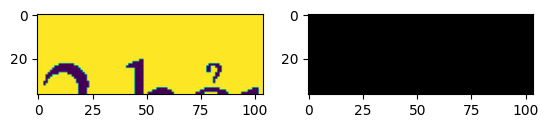

In [152]:
(x,y,w,h) =(711, 518, 104, 37)

img1=thresh[y:y+h,x:x+w]
img2 =worddilate[y:y+h,x:x+w]

plt.subplot(1,2,1)
plt.imshow(thresh[y:y+h,x:x+w])
plt.subplot(1,2,2)
plt.imshow(worddilate[y:y+h,x:x+w])

totalpixel = cv2.countNonZero(cv2.bitwise_not(thresh[y:y+h,x:x+w]))
totalboldpixel = cv2.countNonZero(cv2.bitwise_not(worddilate[y:y+h,x:x+w]))

print(totalpixel,totalboldpixel)

plt.imshow (cv2.bitwise_not(img2),cmap='gray')
        

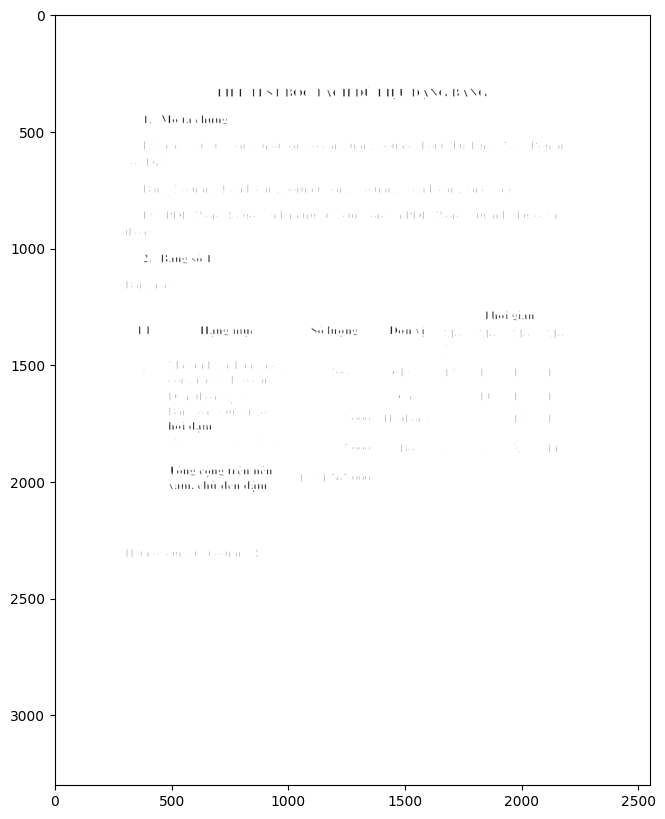

In [153]:
# 
threshInv = cv2.bitwise_not(thresh)
bold_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

morphImg = cv2.dilate(thresh,bold_kernel,iterations=1)

plt.figure(figsize=(8,10))
plt.imshow(morphImg,cmap='gray')

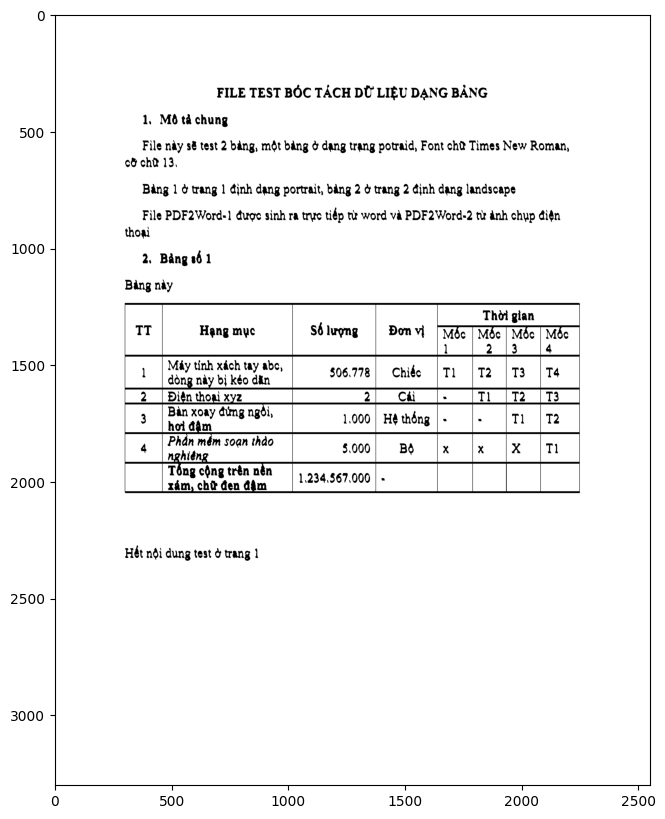

In [154]:
KERNEL = np.asarray([
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
], np.uint8)
KERNEL_ITALIC = np.asarray([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 0],
    [0, 1, 1, 0],
    [1, 1, 0, 0],
    [1, 1, 0, 0],
    [1, 1, 0, 0],
], np.uint8)

def pre_process_italic(img):
    img_f = cv2.flip(img, 1)

    img = cv2.erode(img, KERNEL_ITALIC, iterations=1)
    img = cv2.dilate(img, KERNEL, iterations=1)

    img_f = cv2.erode(img_f, KERNEL_ITALIC, iterations=1)
    img_f = cv2.dilate(img_f, KERNEL, iterations=1)
    img_f = cv2.flip(img_f, 1)
    return img, img_f

def apply_func_italic(bbox, original, preprocessed):

    b_1 = bbox[1]
    b_3 = bbox[3]
    b_0 = bbox[0]
    b_2 = bbox[2]

    a, b = np.mean(original[b_1:b_3, b_0:b_2]), np.mean(preprocessed[b_1:b_3, b_0:b_2])

    return get_ratio(a, b)

def get_ratio(a, b):
    return ((a - b) / (a + b + 1e-8)) * 2


_,img_f = pre_process_italic(thresh)

plt.figure(figsize=(8,10))
plt.imshow(img_f,cmap='gray')